## User Segmentation

In [172]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import RobustScaler
from yellowbrick.cluster import KElbowVisualizer
import re
from textblob import TextBlob
from sklearn.cluster import KMeans

In [173]:
profilesData = pd.read_csv('profilesData.csv')

In [174]:
profilesData.head()

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes_receieved,videos_count,create_time,id,top_videos,url,profile_pic_url
0,01-08-2023,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6.794440e+18,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,01-08-2023,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7.019720e+18,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
2,30-07-2023,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,NaN,6.826680e+18,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
3,06-08-2023,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,41,100,5,NaN,6.809400e+18,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
4,25-07-2023,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,2262,126,4,NaN,6.810530e+18,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...


In [175]:
profilesData.columns

Index(['timestamp', 'account_id', 'nickname', 'biography',
       'awg_engagement_rate', 'comment_engagement_rate',
       'like_engagement_rate', 'bio_link', 'is_verified', 'followers',
       'following', 'likes_receieved', 'videos_count', 'create_time', 'id',
       'top_videos', 'url', 'profile_pic_url'],
      dtype='object')

In [176]:
profilesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                1000 non-null   object 
 1   account_id               1000 non-null   object 
 2   nickname                 1000 non-null   object 
 3   biography                997 non-null    object 
 4   awg_engagement_rate      1000 non-null   float64
 5   comment_engagement_rate  1000 non-null   float64
 6   like_engagement_rate     1000 non-null   float64
 7   bio_link                 191 non-null    object 
 8   is_verified              1000 non-null   bool   
 9   followers                1000 non-null   int64  
 10  following                1000 non-null   int64  
 11  likes_receieved          1000 non-null   int64  
 12  videos_count             1000 non-null   int64  
 13  create_time              0 non-null      float64
 14  id                       

In [177]:
profilesData.value_counts().isna()

Series([], Name: count, dtype: bool)

In [178]:
profilesData[profilesData['biography'].isna()]

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes_receieved,videos_count,create_time,id,top_videos,url,profile_pic_url
9,30-07-2023,_k_1_ji_ji_e_ip__,_k_1_ji_ji_e_ip__,NaN,0.476190,0.047619,0.428571,https://t.me/wotblitzfreebot?start=2024639240,False,14,116,18,3,NaN,6.986180e+18,https://www.tiktok.com/@_k_1_ji_ji_e_ip__/vide...,https://www.tiktok.com/@_k_1_ji_ji_e_ip__,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
379,29-07-2023,r0meo004,r0meo004,NaN,0.079229,0.006506,0.072724,https://youtube.com/channel/UCNRRvkh62r8mGmVWy...,False,1401,1269,32800,615,NaN,6.561430e+18,https://www.tiktok.com/@r0meo004/video/7259847...,https://www.tiktok.com/@r0meo004,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
811,11-08-2023,duki,dukoyasupiste,NaN,0.511269,0.002052,0.509217,NaN,True,3000000,15,3000000,2,NaN,6.999050e+18,https://www.tiktok.com/@duki/video/72499871590...,https://www.tiktok.com/@undefined,https://p77-sign-va.tiktokcdn.com/musically-ma...


In [179]:
profilesData.isna().sum()

timestamp                     0
account_id                    0
nickname                      0
biography                     3
awg_engagement_rate           0
comment_engagement_rate       0
like_engagement_rate          0
bio_link                    809
is_verified                   0
followers                     0
following                     0
likes_receieved               0
videos_count                  0
create_time                1000
id                            0
top_videos                    0
url                           0
profile_pic_url               0
dtype: int64

In [180]:
profilesData.drop(columns={'create_time'}, inplace=True)

In [181]:
profilesData['biography'] = profilesData['biography'].fillna('None')

In [182]:
profilesData.describe()

,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,followers,following,likes_receieved,videos_count,id
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1.000000e+03
mean,0.562932,0.026569,0.536364,1.130869e+05,1136.810000,3.371786e+06,271.942000,6.261038e+18
std,3.222055,0.140016,3.159788,6.698270e+05,2072.258891,3.128021e+07,464.261197,1.870752e+18
min,0.000091,0.000000,0.000000,1.000000e+00,0.000000,3.000000e+00,1.000000,1.610000e+05
25%,0.012528,0.000252,0.011791,6.712500e+02,75.750000,1.930000e+03,18.000000,6.656162e+18
50%,0.053558,0.001203,0.049653,5.241000e+03,295.000000,3.895000e+04,88.000000,6.804025e+18
75%,0.202409,0.006157,0.189987,3.160000e+04,1065.750000,4.986000e+05,318.000000,6.936875e+18
max,63.375000,2.000000,63.000000,1.450000e+07,10000.000000,8.635000e+08,5394.000000,7.253330e+18


In [183]:
profilesData.isna().sum()

timestamp                    0
account_id                   0
nickname                     0
biography                    0
awg_engagement_rate          0
comment_engagement_rate      0
like_engagement_rate         0
bio_link                   809
is_verified                  0
followers                    0
following                    0
likes_receieved              0
videos_count                 0
id                           0
top_videos                   0
url                          0
profile_pic_url              0
dtype: int64

In [184]:
print(profilesData.groupby('is_verified').size())

is_verified
False    981
True      19
dtype: int64



The low proportion of verified accounts (19 out of 1,000) aligns with TikTok's verification criteria focusing on activity, authenticity, notability, and uniqueness rather than follower or like counts, underscoring the platform's commitment to quality and genuine influence.

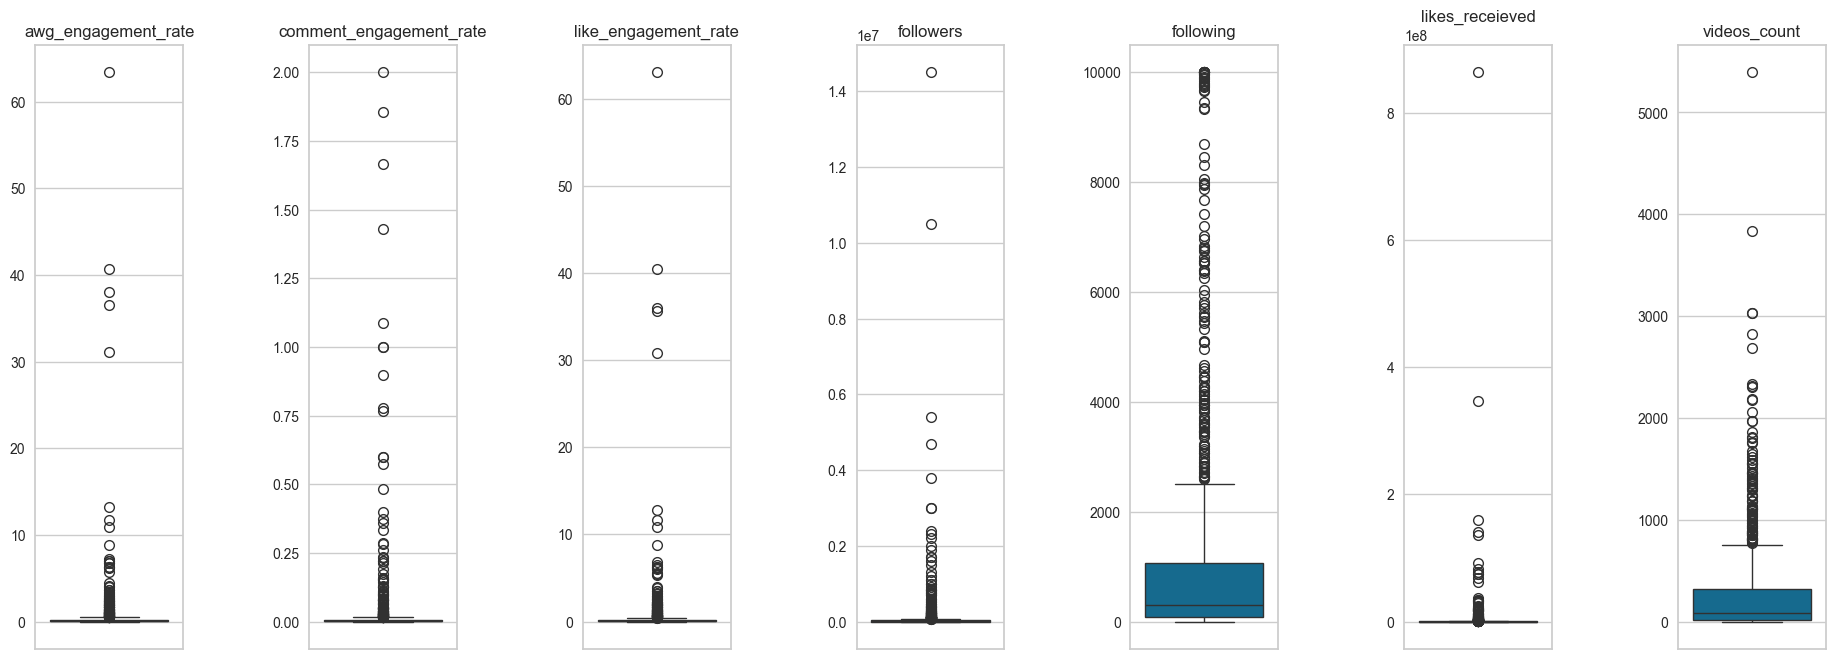

In [185]:
numerical_cols = ['awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate', 'followers', 'following', 'likes_receieved', 'videos_count']

fig, axes = plt.subplots(ncols=len(numerical_cols), nrows=1, figsize=(20, 8))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_cols):
    sns.boxplot(ax=axes[i], y=profilesData[col], orient='v')
    axes[i].set_title(col)
    axes[i].set_ylabel('')

plt.show()

- Engagement Rates: The presence of outliers in engagement metrics suggests a few profiles significantly outperform the average, likely due to highly engaging content or influential user status.

- Followers: A right-skewed distribution with a few accounts having an exceptionally high number of followers suggests the presence of celebrities or top content creators among a majority of regular users.

- Following: Generally consistent following counts with some high outliers could indicate promotional strategies or non-organic following behaviors among certain users.

- Likes Received: The positive skew in likes indicates that most users receive a modest number, but a select few receive a vastly higher count, pointing towards influencer or viral profiles.

- Videos Count: A relatively even distribution in the number of videos posted with a few users showing very high activity levels indicates the presence of dedicated or professional content creators.

#### Feature Engineering

In [186]:
profilesData['timestamp'] = pd.to_datetime(profilesData['timestamp'], format='%d-%m-%Y')
profilesData['day_of_month'] = profilesData['timestamp'].dt.day
profilesData['month'] = profilesData['timestamp'].dt.month
profilesData['year'] = profilesData['timestamp'].dt.year

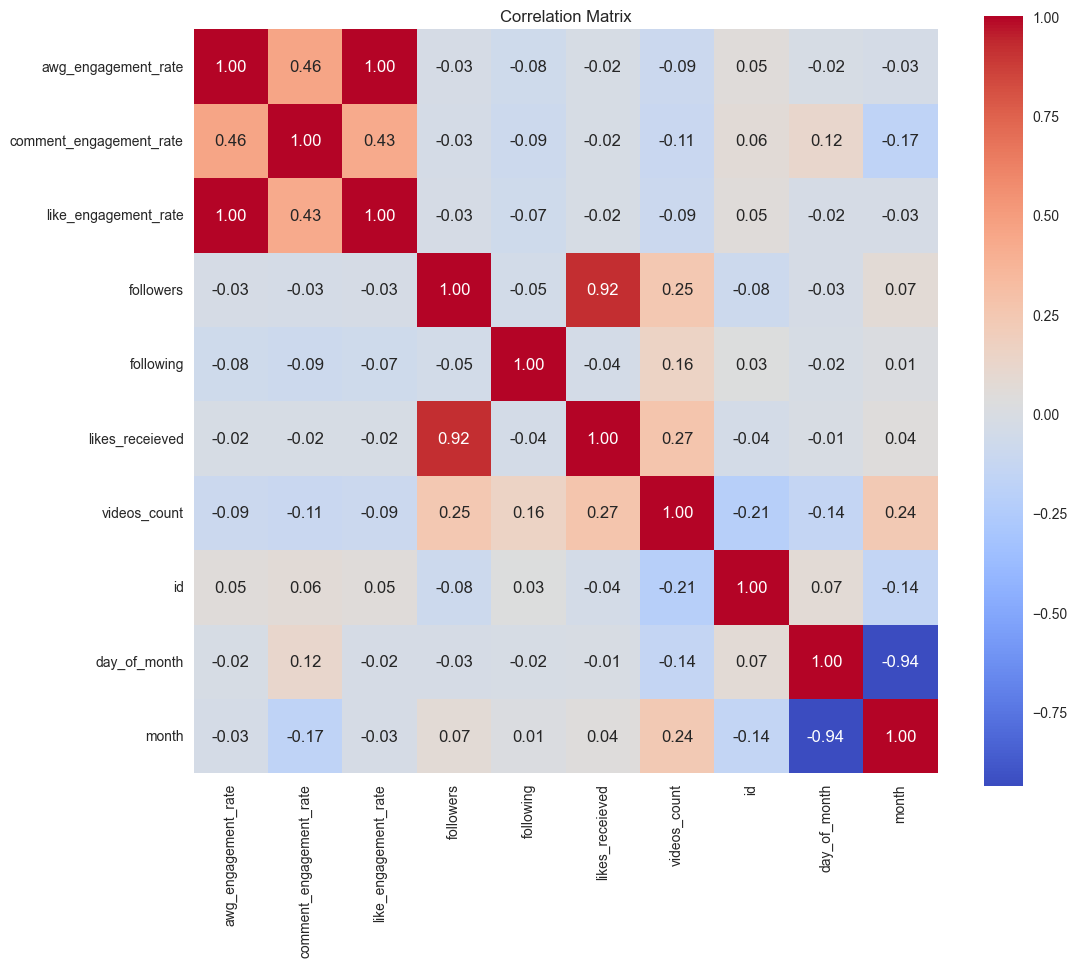

In [187]:
numeric_cols = profilesData.select_dtypes(include=['float64', 'int64', 'int32']).columns
numeric = profilesData[numeric_cols]
if 'year' in numeric.columns:
    numeric = numeric.drop('year', axis=1)
corr_matrix = numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix')
plt.show()

1. **Strong Correlations:**
   - **awg_engagement_rate** and **like_engagement_rate** are perfectly correlated (1.00). This suggests that likes might be the predominant form of engagement, or that awg_engagement_rate includes like engagement rate as a significant component.
   - **followers** and **likes_received** are strongly correlated (0.92), supporting the notion that accounts with more followers tend to receive more likes, benefiting from a broader reach.
   - **videos_count** and **likes_received** have a significant positive correlation (0.27), indicating that accounts posting more videos tend to accumulate more likes, likely due to higher overall visibility and engagement.

2. **Moderate Correlations:**
   - **awg_engagement_rate** and **comment_engagement_rate** display a moderate positive correlation (0.46), suggesting that profiles with high like engagement often experience higher comment engagement as well.
   - The followers-to-following ratio and **comment_engagement_rate** show a moderate positive correlation (0.46), indicating that a balanced follower-to-following ratio may contribute to higher comment engagement, perhaps due to more genuine or reciprocal interactions.

3. **Weak or No Correlations:**
   - **followers** show very low correlation with **awg_engagement_rate** and **like_engagement_rate** (both around -0.03). This indicates that simply having a large number of followers doesn't necessarily guarantee higher engagement rates per post, highlighting the importance of content quality or relevance.
   - **following** exhibits minimal correlation with any engagement metrics, reinforcing the idea that the number of accounts a user follows does not strongly impact how others engage with their content.
   - **day_of_month** and **month** exhibit very low correlations with engagement metrics, suggesting that the specific time of posting within the month or the month itself has minimal direct impact on engagement.

#### Clustering
Considering the numerical features of the dataset which can contribute to segmenting the users

In [188]:
features = [
    'followers',
    'comment_engagement_rate',
    'like_engagement_rate',
    'likes_receieved',
    'videos_count'
]
X = profilesData[features]

In [189]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

##### Applying K-Means considering all variables

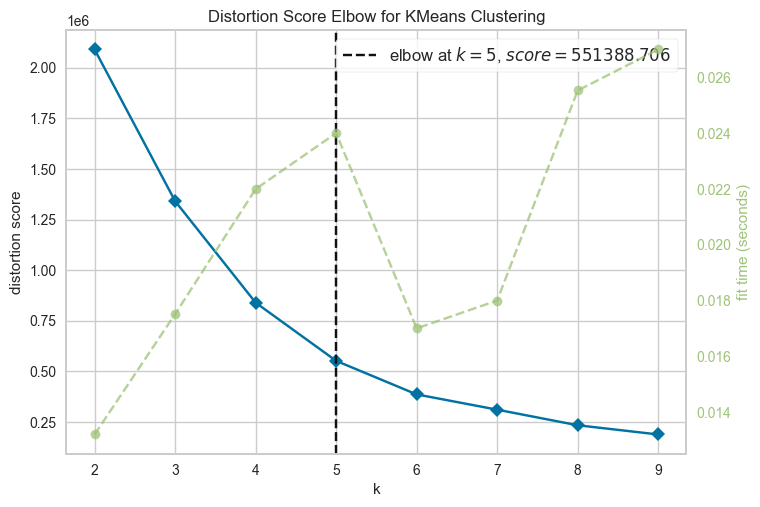

Optimal clusters:  5


In [190]:
kmeans_model = KMeans(random_state=0, n_init=10)
visualizer = KElbowVisualizer(kmeans_model, k=(2,10), timings=True)

visualizer.fit(X_scaled)  
visualizer.show() 

optimal_clusters = visualizer.elbow_value_
kmeans_optimal = KMeans(n_clusters=optimal_clusters,n_init=10, random_state=0).fit(X_scaled)
cluster_labels = kmeans_optimal.labels_
centroids = kmeans_optimal.cluster_centers_  

print('Optimal clusters: ',optimal_clusters)

In [191]:
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
kmeans_final.fit(X_scaled)
profilesData['cluster'] = kmeans_final.labels_

In [192]:
cluster_summary = profilesData.groupby('cluster')[features].mean()

print("General User Segments Summary:")
cluster_summary

General User Segments Summary:


,followers,comment_engagement_rate,like_engagement_rate,likes_receieved,videos_count
cluster,,,,,
0,6.245913e+04,0.012377,0.303972,1.223392e+06,262.726619
1,1.450000e+07,0.000065,0.008058,8.635000e+08,2333.000000
2,1.050000e+07,0.000047,0.010866,3.470000e+08,847.000000
3,2.730000e+06,0.000311,0.043198,9.700000e+07,1306.700000
4,9.432000e+02,0.968161,16.009867,6.168647e+04,4.133333


### Cluster 0: Active and Engaged Users
- **Followers:** This cluster has a moderate following (~62,459 on average), indicating a solid presence on the platform without being among the top influencers.
- **Engagement Rates:** With an average comment engagement rate of 0.012% and like engagement rate of 0.30%, these users enjoy decent engagement, suggesting their content resonates well with their audience.
- **Likes Received & Content Creation:** They have received over 1.2 million likes and posted about 263 videos on average, showing they are active content creators with successful engagement.
- **Following:** Following over 1,163 accounts suggests they are also engaged in community building or networking within the platform.
- **Strategy:** Encourage content diversity and cross-promotion. These users have a solid foundation to potentially become influencers themselves.
- **Recommendations:**
  - Host challenges or themed events to spur creative content creation.
  - Facilitate collaborations with similar-tier accounts to expand reach.

### Cluster 1: Platform Giants
- **Followers:** With 14.5 million followers, this cluster represents the top-tier influencers or celebrity accounts on the platform.
- **Engagement Rates:** The engagement rates are relatively low, which is common for accounts with a vast reach due to the broad and diverse audience.
- **Likes Received & Content Creation:** An extraordinarily high number of likes received (863.5 million) and a large number of videos (2,333) indicate these are highly prolific and influential profiles.
- **Following:** A lower following count (47) compared to their followers highlights a typical influencer/follower dynamic.
- **Strategy:** Leverage their reach for broader marketing campaigns and brand partnerships. These profiles can serve as brand ambassadors or pivotal figures in large-scale promotions.
- **Recommendations:**
  - Develop exclusive partnerships that align with their brand and audience interests.
  - Create feature content or behind-the-scenes exclusives to increase platform stickiness.
  - Use these accounts for platform-wide announcements or to boost platform initiatives.

### Cluster 2: Emerging Influencers
- **Followers:** Users with an average of ~3.44 million followers are likely emerging influencers gaining traction.
- **Engagement Rates:** Lower engagement rates than smaller profiles but still significant for their size, indicating effective content strategies that could scale with their growth.
- **Likes Received & Content Creation:** Having received around 119.7 million likes and posted approximately 1,265 videos, these profiles are very active with a growing audience.
- **Following:** Following 411 accounts suggests a balanced approach to engagement and networking.
- **Strategy:** Support their growth trajectory with visibility-enhancing features and monetization opportunities to keep them engaged and loyal to the platform.
- **Recommendations:**
  - Introduce them to brand partnership programs early.
  - Highlight their content in curated feeds or “up-and-coming” sections.
  - Provide analytics and tools that help them understand and expand their audience.

### Cluster 3: Established Content Creators
- **Followers:** This cluster includes well-established creators with a substantial following of about 2.73 million, indicating a strong presence on the platform.
- **Engagement Rates:** Moderately high engagement rates with 0.031% for comments and 4.32% for likes, suggesting effective interaction with a large audience.
- **Likes Received & Content Creation:** These profiles have garnered around 97 million likes and posted an average of 1,307 videos, demonstrating their active and influential status.
- **Following:** An average following of 451 suggests they maintain broad networking within the community, which supports their content distribution.
- **Strategy:** Utilize their extensive reach and consistent content output to anchor larger promotional campaigns and collaborations.
- **Recommendations:**
  - Engage these creators in brand ambassadorships or major collaborative projects that can leverage their influence.
  - Offer exclusive features or early access to new tools that can help them maintain their edge in content creation.
  - Organize or sponsor their participation in events and webinars that underscore their thought leadership in their respective niches.

### Cluster 4: Highly Engaged Niche Creators
- **Followers:** The smallest following in the dataset (942 on average), likely representing niche creators or newer profiles.
- **Engagement Rates:** Exceptionally high comment (0.97%) and like (16.01%) engagement rates, indicating a very engaged and possibly dedicated niche audience.
- **Likes Received & Content Creation:** Despite the smaller scale, these users have received a significant number of likes (around 61,686) and have a moderate level of activity with about 4 videos posted.
- **Following:** A relatively small following count (22.73) suggests focused engagement and community interaction.
- **Strategy:** Foster their niche communities and leverage their high engagement rates for niche marketing and community building.
- **Recommendations:**
  - Offer community-building tools and features that help these creators engage even deeper with their audience.
  - Promote their content in niche-specific channels or recommendations.
  - Encourage their participation in niche or topic-specific discussions, AMAs (Ask Me Anything), or webinars.